# Credit Card Fraud
### Written By Leo Carrico
For this project, we will be doing the typical fraud detection to prevent money loss from fraud credit card usage. We will be trying to predict whether the credit card used is a fake based on the current and prevent statistics from users. In our case here, due to the volume of transactions vs actual fraud amount our accuracy for this project much be high in order for this to be applicable.

## Importing the data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data = pd.read_csv("dataset/creditcard.csv")

In [102]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [103]:
desc =  data.describe().T
data_ranges = desc['max'] - desc['min']
data_ranges.describe()

count        31.000000
mean       6447.513951
std       31213.534835
min           1.000000
25%          17.315686
50%          34.416326
75%          80.280037
max      172792.000000
dtype: float64

In [104]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [105]:
response = data['Class']
data = data.drop(columns=['Class'])

## Data Visualization

<AxesSubplot:>

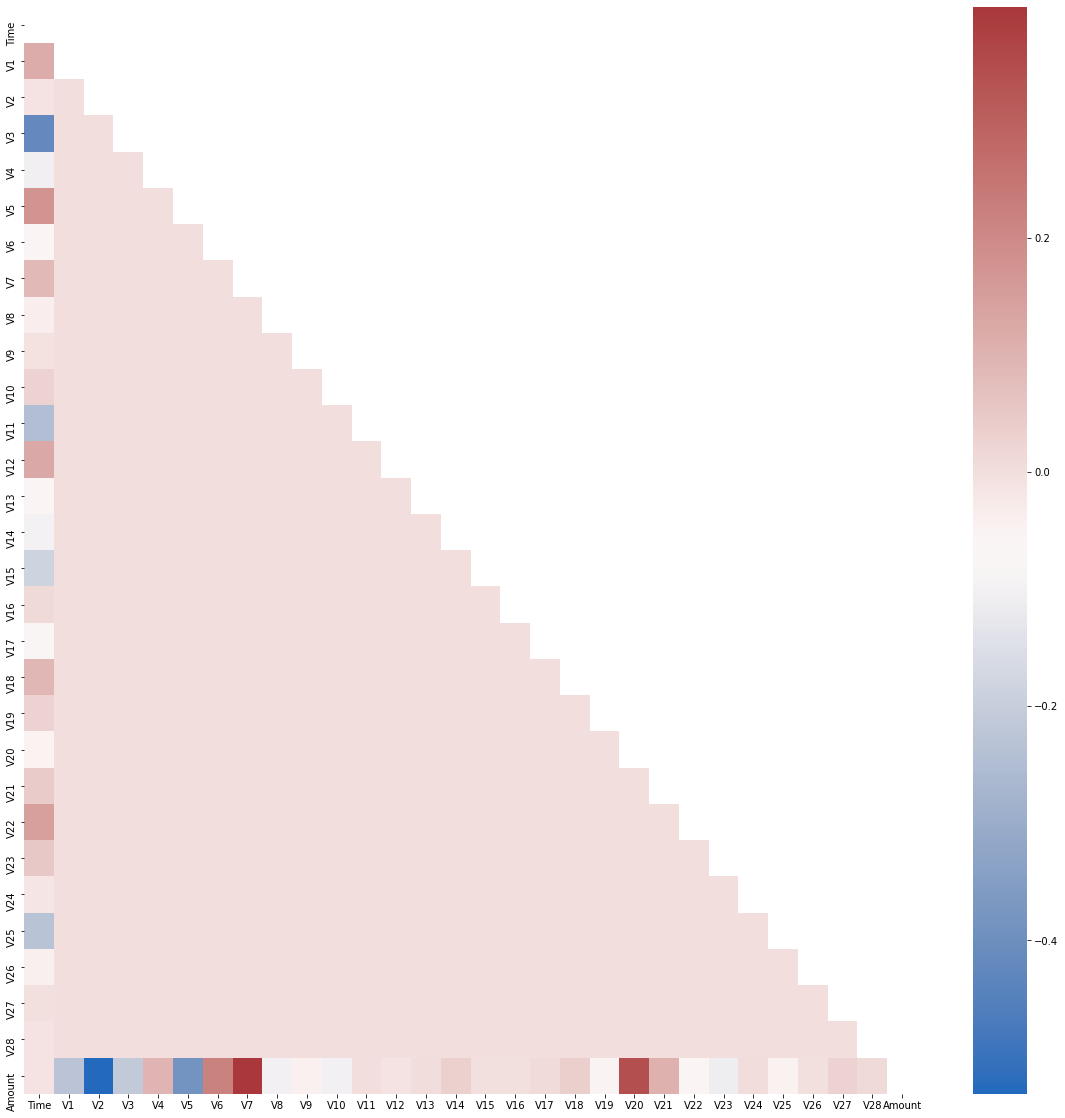

In [106]:
corrs = data.corr()
plt.figure(figsize=(20,20))
mask = np.triu(corrs)
sns.heatmap(corrs, cmap="vlag", mask=mask)

## Data Processing

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA()

In [109]:
data_reduced = pca.fit_transform(data, 10)

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
scaler.fit(data)

StandardScaler()

In [113]:
data = scaler.transform(data)
response = response.to_numpy()

In [114]:
data_reduced = scaler.transform(data_reduced)

In [115]:
data[:5, :5]

array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551],
       [-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293],
       [-1.99656197, -0.69350046, -0.81157783,  1.16946849,  0.26823129],
       [-1.99656197, -0.4933249 , -0.11216942,  1.18251645, -0.60972664],
       [-1.99654091, -0.59132976,  0.53154105,  1.02141168,  0.2846554 ]])

In [116]:
response[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(data, response)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(data_reduced, response)

In [119]:
from collections import Counter

In [120]:
Counter(y_train)

Counter({0: 213230, 1: 375})

In [121]:
from imblearn.over_sampling import SMOTE

In [122]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [123]:
smote = SMOTE()
X_train_reduced, y_train_reduced = smote.fit_resample(X_train_reduced, y_train_reduced)

In [139]:
Counter(y_train_reduced)

Counter({0: 213231, 1: 213231})

In [124]:
Counter(y_train)

Counter({0: 213230, 1: 213230})

## Training our Ensemble Classifier

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
clf = GradientBoostingClassifier(verbose=2)

In [130]:
clf.fit(X_train_reduced, y_train_reduced)

      Iter       Train Loss   Remaining Time 
         1           1.2272            9.45m
         2           1.0967            9.63m
         3           0.9880            9.57m
         4           0.8956            9.52m
         5           0.8165            9.45m
         6           0.7482            9.32m
         7           0.6895            9.21m
         8           0.6373            9.16m
         9           0.5918            9.16m
        10           0.5523            9.43m
        11           0.5158            9.36m
        12           0.4852            9.28m
        13           0.4571            9.27m
        14           0.4309            9.33m
        15           0.4084            9.23m
        16           0.3872            9.12m
        17           0.3679            9.03m
        18           0.3502            8.98m
        19           0.3356            8.87m
        20           0.3211            8.75m
        21           0.3072            8.65m
        2

GradientBoostingClassifier(verbose=2)

In [135]:
y_pred_reduced = clf.predict(X_test_reduced)

In [138]:
Counter(y_pred_reduced)

Counter({0: 70456, 1: 746})

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

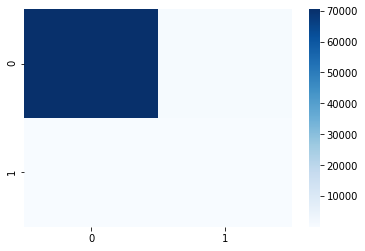

In [136]:
cm = confusion_matrix(y_test_reduced, y_pred_reduced)
sns.heatmap(data=cm, cmap="Blues")

In [140]:
print(classification_report(y_test_reduced, y_pred_reduced))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71084
           1       0.14      0.86      0.24       118

    accuracy                           0.99     71202
   macro avg       0.57      0.93      0.62     71202
weighted avg       1.00      0.99      0.99     71202



## Training our Neural Network

In [141]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [147]:
model = Sequential([
    Dense(units=16, input_dim=30, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [148]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
____________________________________________________

In [150]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
28431/28431 [==============================] - 35s 1ms/step - loss: 0.0352 - accuracy: 0.9881
Epoch 2/5
28431/28431 [==============================] - 31s 1ms/step - loss: 0.0167 - accuracy: 0.9955
Epoch 3/5
28431/28431 [==============================] - 36s 1ms/step - loss: 0.0134 - accuracy: 0.9965
Epoch 4/5
28431/28431 [==============================] - 36s 1ms/step - loss: 0.0102 - accuracy: 0.9974
Epoch 5/5
28431/28431 [==============================] - 46s 2ms/step - loss: 0.0102 - accuracy: 0.9973


In [154]:
y_pred = model.predict_classes(X_test).T[0]
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:>

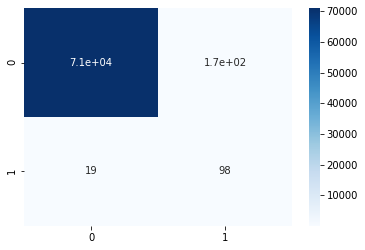

In [156]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, cmap="Blues", annot=True)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71085
           1       0.36      0.84      0.51       117

    accuracy                           1.00     71202
   macro avg       0.68      0.92      0.75     71202
weighted avg       1.00      1.00      1.00     71202



In [158]:
from sklearn.metrics import accuracy_score

In [159]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {round(acc*100, 4)}%")

Accuracy Score: 99.7332%


## Conclusion
In conclusion, we can see that our accuracy score is at 99.73% which is a bit over our requirement of 99%. From here we can make the conclusion that using a neural network or similar model can be an effective solution to predicting whether a credit card is fraudulent.<br>
To futher expand this, we could later attempt to identify what features where most important in predicting whether a card is fraudulent, in order to learn patterns of those who commit fraud. 